In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
import jax
import jax.numpy as jnp
from jax import random
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
%matplotlib inline

3.1. Sampling from a grid-approximate posterior

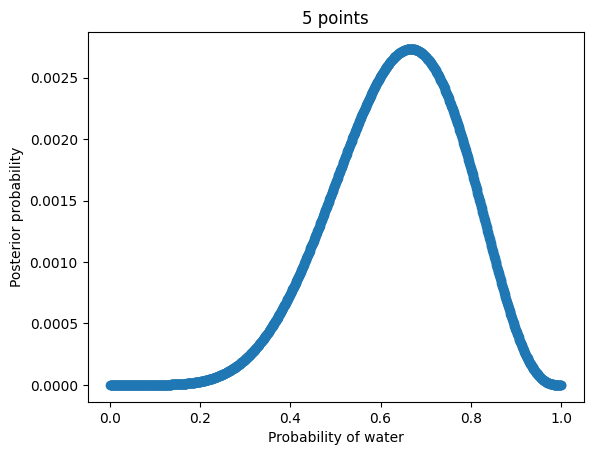

In [5]:
w, n = 6, 9
p_grid = np.linspace(0, 1, num=1000)
prob_p = np.repeat(1, 1000)
# compute likelihood at each value in the grid
prob_data = binom.pmf(w, n, p_grid)
unstd_posterior = prob_data * prob_p

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / sum(unstd_posterior)

# plot the posterior distribution
plt.plot(p_grid, posterior, 'o-')
plt.xlabel('Probability of water')
plt.ylabel('Posterior probability')
plt.title('5 points')
plt.show()


In [12]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

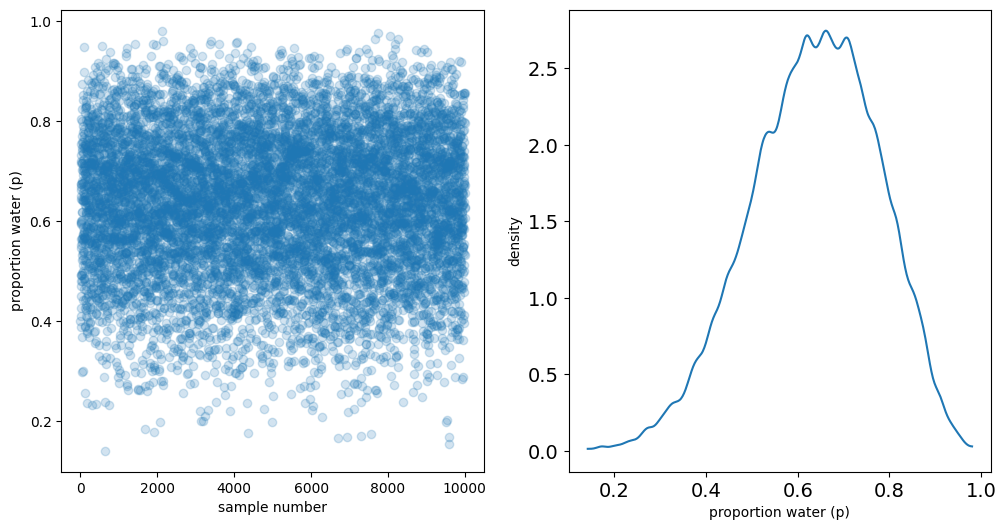

In [13]:
import arviz as az
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

In [9]:
# add up posterior probability where p < 0.5
sum(posterior[p_grid < 0.5])

np.float64(0.17187458902022879)

 a 50% HPDI is a bucket filled with all posteriors with highest likelihood probablities, cut off at the point where 50% of the posterior data has been collected.

 A 50% HPDI is an interval containing the densest (most likely) regions of the posterior distribution, capturing 50% of the total posterior probability mass. This interval includes the values of the parameter that have the highest likelihood given the data and cuts off at the point where 50% of the probability mass has been accumulated.